In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [1]:
import joblib

similarity_matrix = joblib.load('artifacts/similarity_matrix.pkl')

articles = joblib.load('artifacts/articles.pkl')

In [2]:
similarity_matrix

array([[1.        , 1.        , 0.99999994, ..., 0.99999015, 0.84116925,
        0.99999015],
       [1.        , 1.        , 0.99999994, ..., 0.99999015, 0.84116925,
        0.99999015],
       [0.99999994, 0.99999994, 1.        , ..., 0.99998939, 0.84133811,
        0.99998939],
       ...,
       [0.99999015, 0.99999015, 0.99998939, ..., 1.        , 0.83930057,
        1.        ],
       [0.84116925, 0.84116925, 0.84133811, ..., 0.83930057, 1.        ,
        0.83930057],
       [0.99999015, 0.99999015, 0.99998939, ..., 1.        , 0.83930057,
        1.        ]])

In [3]:
def recommend(article_id):
    idx = articles[articles['article_id'] == article_id].index[0]
    similar_articles = np.argsort(similarity_matrix[idx])[::-1]
    return articles.iloc[similar_articles[:20]]

In [4]:
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

def display_recommended_images(product_ids, image_dir):
    fig = plt.figure(figsize=(20, 20))
    grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.5)
    
    for ax, product_id in zip(grid, product_ids):
        
        image_path = os.path.join(image_dir, f"{product_id[0:3]}", f"{product_id}.jpg")

        if os.path.isfile(image_path):
            img = Image.open(image_path)
            ax.imshow(img)
            ax.set_title(f"Product ID: {product_id}")
            ax.axis('off')
            
        else:
            print(f"Image {product_id} not found.")
            ax.axis('off')
    plt.show()
    

def display_purchased_images(product_ids, image_dir):
    for product_id in product_ids:
        image_path = os.path.join(image_dir, f"{product_id[0:3]}", f"{product_id}.jpg")
        if os.path.isfile(image_path):
            img = Image.open(image_path)
            plt.imshow(img)
            plt.title(f"Product ID: {product_id}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image {product_id} not found.")

In [5]:
randomRow = articles[:50000].sample(1)
randomRow

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
40624,665212003,665212,Jens,252,Sweater,Garment Upper body,1010010,Melange,17,Yellowish Brown,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,Jumper in a soft cable knit containing some wo...


In [8]:
test = randomRow['article_id'].values[0]   

recommendations = recommend(test)

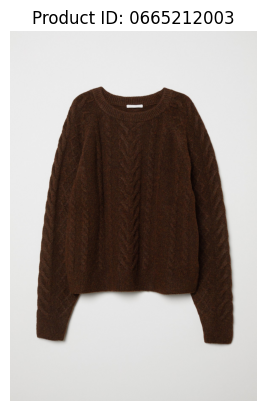

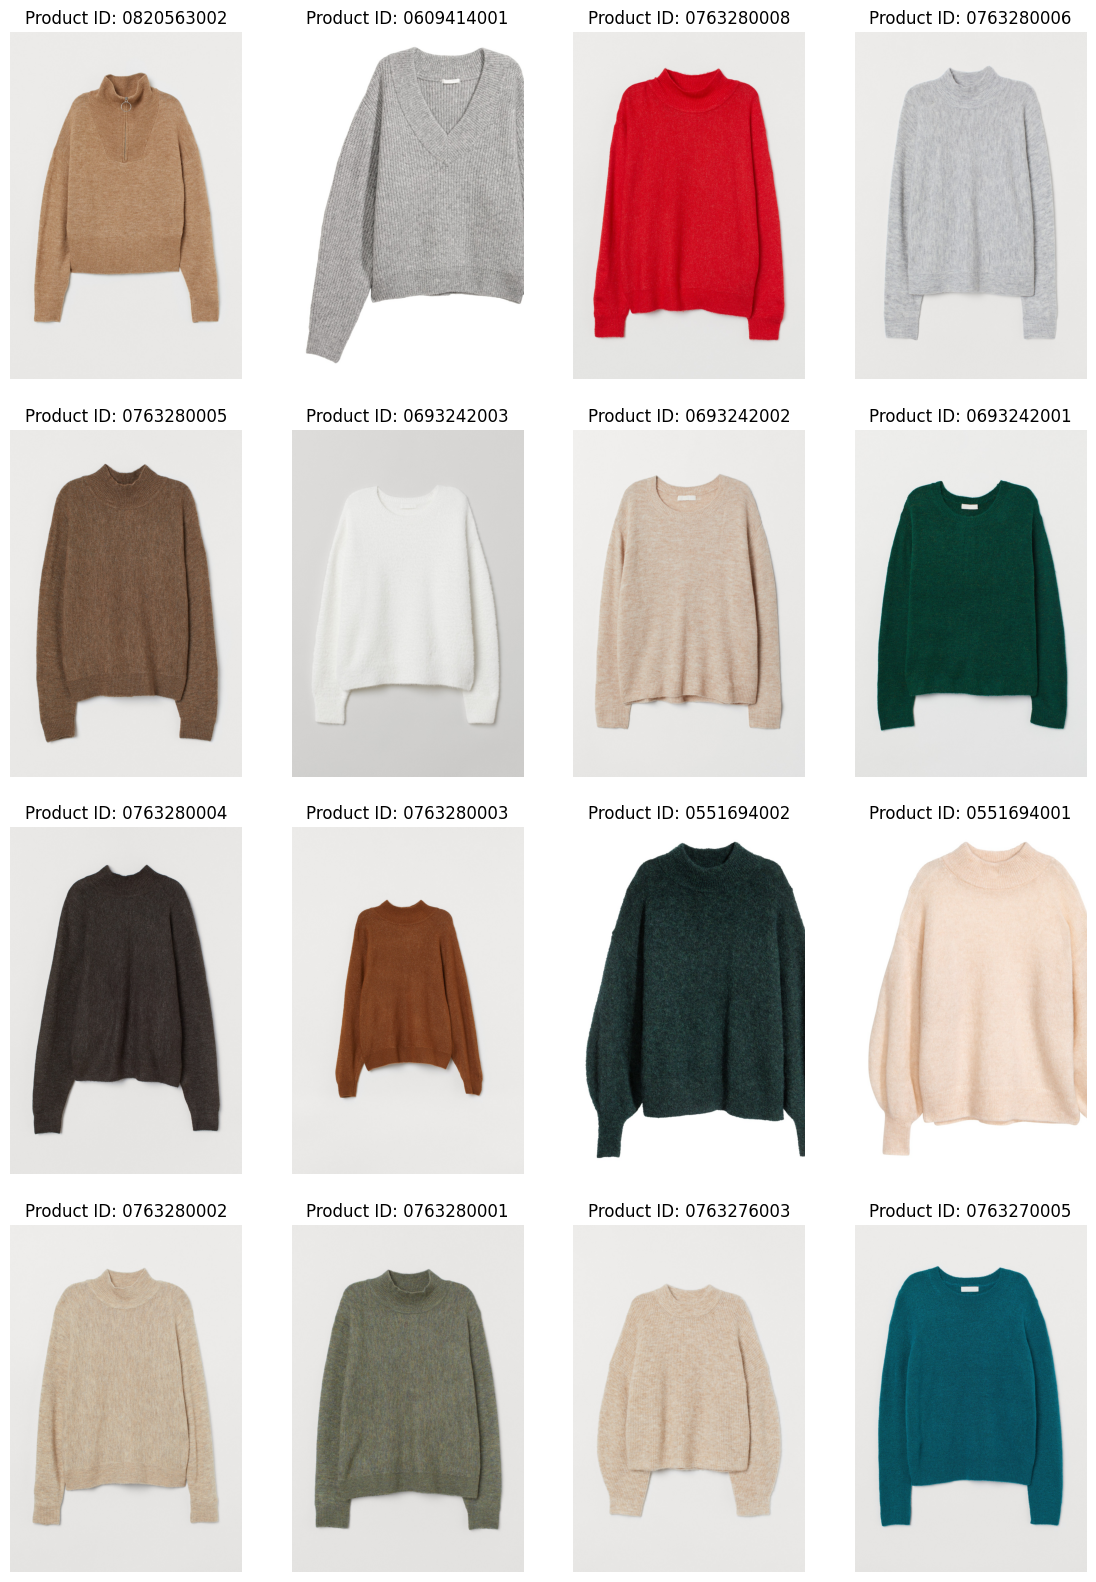

In [11]:
imgInput =('0' + str(test))

image_directory = 'data\images'

display_purchased_images([imgInput], image_directory)


product_ids = ['0' + str(i) for i in recommendations['article_id'].values]
image_directory = 'data\images'

display_recommended_images(product_ids, image_directory)